In [30]:
import sys
import os
sys.path.insert(0, "/home/mcarenso/code/stage-2023-multiscale-extremes/scripts/src")
from myImports import *
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
## Openfile to check
path_to_file_to_check = os.getcwd()+"/rcemip_prec_1°x1day_remeshed_by_mean_with_300K_for_3days.nc"
ds = xr.open_dataset(path_to_file_to_check)
n_days = len(ds["time"]) ## TODO string comprehension should catch the number of days here
ds

<xarray.Dataset>
Dimensions:  (x: 62, y: 4, time: 3)
Coordinates:
  * x        (x) float64 31.5 63.5 95.5 127.5 ... 1.92e+03 1.952e+03 1.984e+03
  * y        (y) float64 15.5 47.5 79.5 111.5
  * time     (time) float64 23.5 71.5 119.5
Data variables:
    Prec     (time, y, x) float32 ...

In [33]:
#Open CACATOES data, TODO : add text recognition from the file to check to select the correct temp and number of days
cacatoes_dir_path = "/homedata/fiolleau/RCE/CACATOES/"
ds1 = xr.open_dataset(cacatoes_dir_path+"cacatoes_rcemip_SAM_RCE_large300_2D.nc")
ds1["time"] = (ds1["time"]/8.64e13).astype(int)
ds1 = ds1.isel(time=slice(n_days)) 
ds1

<xarray.Dataset>
Dimensions:                       (Y: 4, X: 62, time: 3, CondPrecip: 17,
                                   MCS: 150)
Coordinates:
  * time                          (time) int64 0 1 2
  * CondPrecip                    (CondPrecip) int16 0 1 2 3 4 ... 25 30 35 40
Dimensions without coordinates: Y, X, MCS
Data variables: (12/41)
    Ygrid                         (Y) float32 ...
    Xgrid                         (X) float32 ...
    DAILYmcs_Pop                  (time, Y, X) float32 ...
    DAILY_OLR                     (time, Y, X) float32 ...
    DAILY_precip                  (time, Y, X) float32 ...
    DAILY_conditionalprecip       (time, CondPrecip, Y, X) float32 ...
    ...                            ...
    INT_gridtimeOccupation_start  (time, MCS, Y, X) float64 ...
    INT_gridtimeOccupation_end    (time, MCS, Y, X) float64 ...
    INT_surfFraction_235K         (time, MCS, Y, X) float32 ...
    INT_surfFraction_220K         (time, MCS, Y, X) float32 ...
    INT_surfFraction_210K         (time, MCS, Y, X) float32 ...
    INT_surfFraction_200K         (time, MCS, Y, X) float32 ...

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


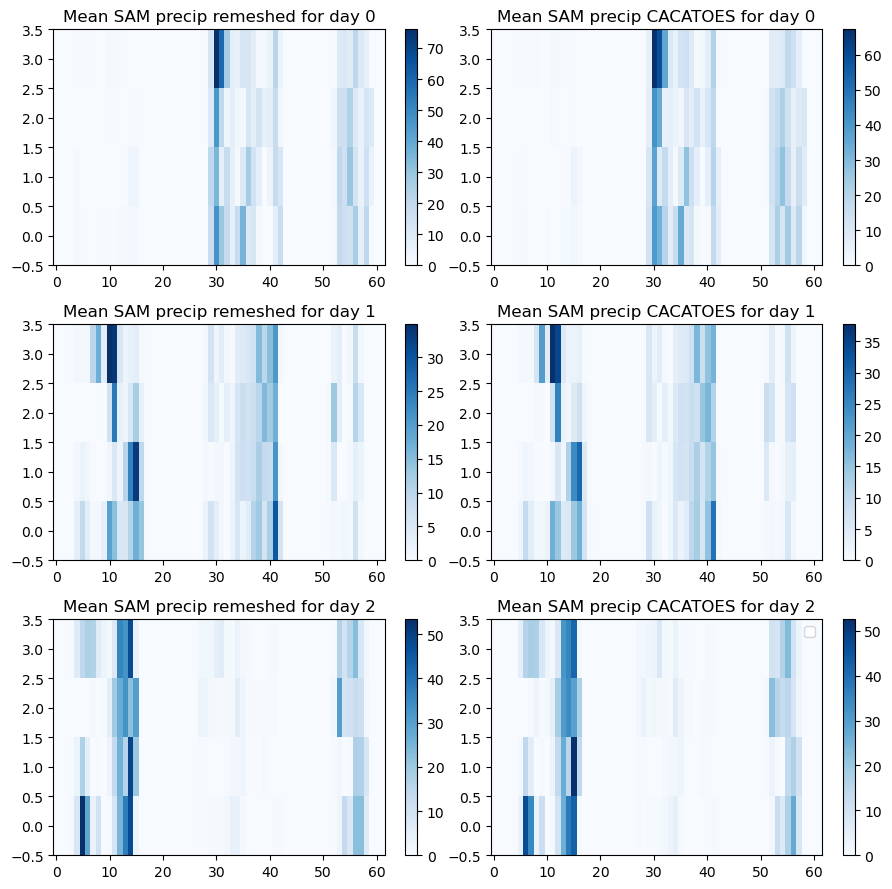

In [38]:
## Use plot to compare the diagnosis for precipitation. (Could use boolean check if the remeshing was exact :'( 
size = 3
fig, axs = plt.subplots(nrows = n_days, ncols = 2, figsize = (size*n_days, size*3))
for t in range(n_days):
    # Plot on left the chart to check 
    left = ds["Prec"][t,:,:].to_numpy()
    img = axs[t, 0].imshow(left, aspect='auto', cmap='Blues', origin = 'lower', label = "mean")
    axs[t, 0].set_title(f"Mean SAM precip remeshed for day {t}")
    fig.colorbar(img, ax = axs[t,0])

    right = ds1["DAILY_precip"][t,:,:].to_numpy()
    img = axs[t, 1].imshow(right, aspect='auto', cmap='Blues', origin = 'lower', label = "mean")
    axs[t, 1].set_title(f"Mean SAM precip CACATOES for day {t}")
    fig.colorbar(img, ax = axs[t,1])

plt.legend()
plt.tight_layout()
plt.show()
